<a href="https://www.kaggle.com/code/abmsayem/covid-19-in-bangladesh?scriptVersionId=125610686" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

The COVID-19 pandemic has had a significant impact on the world, causing widespread illness and death, as well as disrupting economies and societies. One way to understand the impact of the pandemic is by analyzing data on the number of new cases and deaths caused by COVID-19. This dataset contains information on the number of new cases, new deaths, new cases per million, new deaths per million, vaccinated first dose, second dose and third dose of COVID-19 in Bangladesh over a certain period of time. By analyzing this data, we can gain insights into the spread of the disease, the effectiveness of vaccination campaigns, and other factors that may be influencing the course of the pandemic.

***Data Source: Our World In Data***

# Data Cleaning and Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

bd = df[df.location == 'Bangladesh']

new_bd = bd[['date','new_cases','total_cases','new_deaths','total_deaths','new_cases_per_million','total_cases_per_million','new_deaths_per_million','total_deaths_per_million','people_vaccinated','people_fully_vaccinated','total_boosters','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred']]

new_bd.reset_index(drop=True, inplace=True)
new_bd.loc[:, 'date'] = pd.to_datetime(new_bd['date'])
new_bd.loc[:, 'months'] = new_bd['date'].apply(lambda x: x.strftime('%B-%Y'))

nebd = new_bd.groupby('months')[['months','new_cases','new_deaths','new_cases_per_million','new_deaths_per_million']].sum()

newbd = new_bd.groupby('months')[['total_cases','total_deaths','total_cases_per_million','total_deaths_per_million','people_vaccinated','people_fully_vaccinated','total_boosters','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred']].max()

nebd = nebd.sort_index(key=lambda x: pd.to_datetime(x, format='%B-%Y'))
newbd = newbd.sort_index(key=lambda x: pd.to_datetime(x, format='%B-%Y'))

nbhbd = pd.merge(nebd, newbd, how='outer', on=['months'])

nbmbd = nbhbd.rename(columns = {'people_vaccinated':'total_vaccinated_(first-dose)','people_fully_vaccinated':'total_vaccinated_(second-dose)','total_boosters':'total_vaccinated_(third-dose)','people_vaccinated_per_hundred':'total_vaccinated_per_hundred(first-dose)','people_fully_vaccinated_per_hundred':'total_vaccinated_per_hundred(second-dose)','total_boosters_per_hundred':'total_vaccinated_per_hundred(third-dose)'})

nbmbd['new_vaccinated_(first-dose)'] = nbmbd['total_vaccinated_(first-dose)'].diff()
nbmbd['new_vaccinated_(second-dose)'] = nbmbd['total_vaccinated_(second-dose)'].diff()
nbmbd['new_vaccinated_(third-dose)'] = nbmbd['total_vaccinated_(third-dose)'].diff()

nbmbd.at['January-2021', 'new_vaccinated_(first-dose)'] = 567
nbmbd.at['April-2021', 'new_vaccinated_(second-dose)'] = 2805694
nbmbd.at['January-2022', 'new_vaccinated_(third-dose)'] = 1264745

nlbd = nbmbd[['new_cases','new_deaths','new_cases_per_million','new_deaths_per_million','total_cases','total_deaths','total_cases_per_million','total_deaths_per_million','new_vaccinated_(first-dose)','new_vaccinated_(second-dose)','new_vaccinated_(third-dose)','total_vaccinated_(first-dose)','total_vaccinated_(second-dose)','total_vaccinated_(third-dose)','total_vaccinated_per_hundred(first-dose)','total_vaccinated_per_hundred(second-dose)','total_vaccinated_per_hundred(third-dose)']]

df = nlbd.reset_index()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [3]:
df

,months,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,new_vaccinated_(first-dose),new_vaccinated_(second-dose),new_vaccinated_(third-dose),total_vaccinated_(first-dose),total_vaccinated_(second-dose),total_vaccinated_(third-dose),total_vaccinated_per_hundred(first-dose),total_vaccinated_per_hundred(second-dose),total_vaccinated_per_hundred(third-dose)
0,January-2020,0.0,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,February-2020,0.0,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,March-2020,51.0,5.0,0.299,0.030,51.0,5.0,0.298,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,April-2020,7616.0,163.0,44.489,0.953,7667.0,168.0,44.787,0.981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,May-2020,39486.0,482.0,230.661,2.820,47153.0,650.0,275.448,3.797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,June-2020,98330.0,1197.0,574.405,6.992,145483.0,1847.0,849.852,10.789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,July-2020,92178.0,1264.0,538.465,7.383,237661.0,3111.0,1388.317,18.173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,August-2020,75335.0,1170.0,440.074,6.839,312996.0,4281.0,1828.393,25.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,September-2020,50483.0,970.0,294.900,5.668,363479.0,5251.0,2123.294,30.674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,October-2020,44205.0,672.0,258.230,3.925,407684.0,5923.0,2381.521,34.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Brief Overview

In [4]:
total_cases = df['total_cases'].max()
print("Total Cases:", total_cases)

total_deaths = df['total_deaths'].max()
print("Total Deaths:", total_deaths)

total_cases_per_million = df['total_cases_per_million'].max()
print("Total Cases Per Million:", total_cases_per_million)

total_deaths_per_million = df['total_deaths_per_million'].max()
print("Total Deaths Per Million:", total_deaths_per_million)

total_vaccinated_first = df['total_vaccinated_(first-dose)'].max()
print("Total Vaccinated (First Dose):", total_vaccinated_first)

total_vaccinated_second = df['total_vaccinated_(second-dose)'].max()
print("Total Vaccinated (Second Dose):", total_vaccinated_second)

total_vaccinated_third = df['total_vaccinated_(third-dose)'].max()
print("Total Vaccinated (Third Dose):", total_vaccinated_third)

total_vaccinated_per_hundred_first = df['total_vaccinated_per_hundred(first-dose)'].max()
print("Total Vaccinated Per Hundred (First Dose):", total_vaccinated_per_hundred_first)

total_vaccinated_per_hundred_second = df['total_vaccinated_per_hundred(second-dose)'].max()
print("Total Vaccinated Per Hundred (Second Dose):", total_vaccinated_per_hundred_second)

total_vaccinated_per_hundred_third = df['total_vaccinated_per_hundred(third-dose)'].max()
print("Total Vaccinated Per Hundred (Third Dose):", total_vaccinated_per_hundred_third)

Total Cases: 2038091.0
Total Deaths: 29446.0
Total Cases Per Million: 11905.685
Total Deaths Per Million: 172.011
Total Vaccinated (First Dose): 151316328.0
Total Vaccinated (Second Dose): 139737107.0
Total Vaccinated (Third Dose): 67457034.0
Total Vaccinated Per Hundred (First Dose): 88.39
Total Vaccinated Per Hundred (Second Dose): 81.63
Total Vaccinated Per Hundred (Third Dose): 39.41


# Data Visualizations

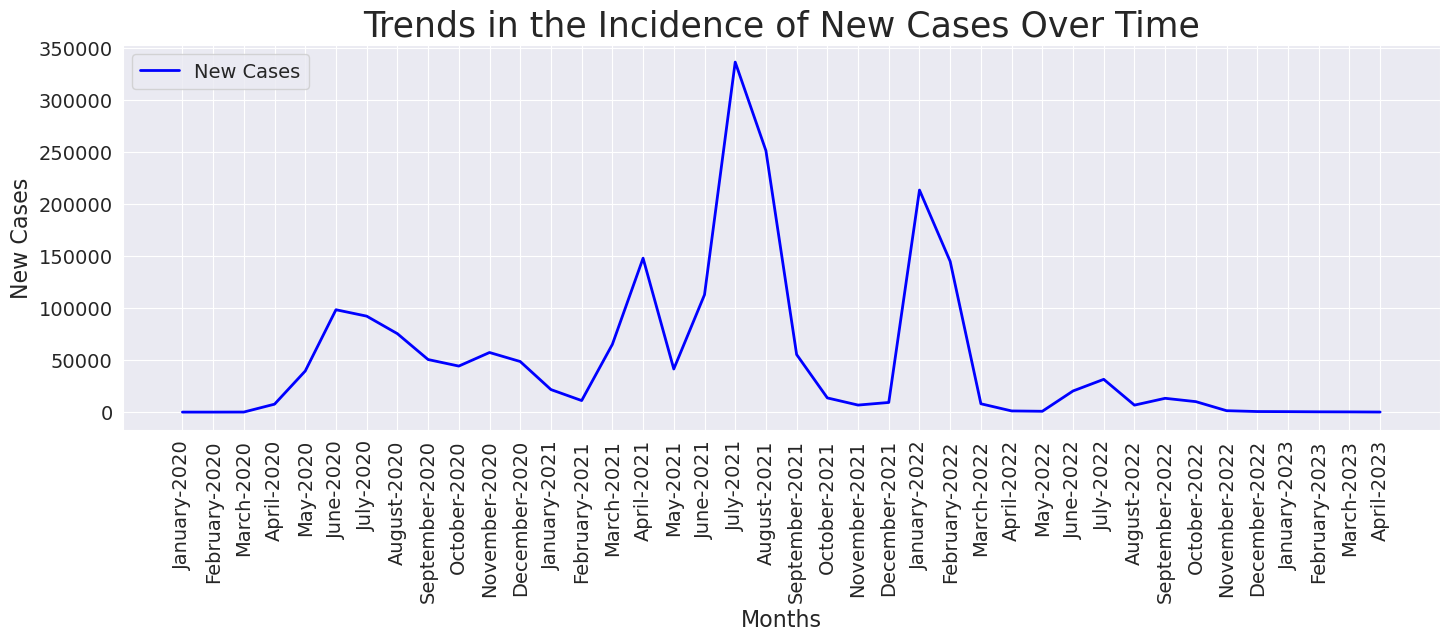

In [5]:
plt.plot(df['months'], df['new_cases'], '-b', lw=2, ms=8)

plt.xlabel('Months', fontsize=16)
plt.ylabel('New Cases', fontsize=16)
plt.title('Trends in the Incidence of New Cases Over Time', fontsize=25)
plt.xticks(rotation = 'vertical')
plt.legend(['New Cases'], loc='upper left')

plt.show();

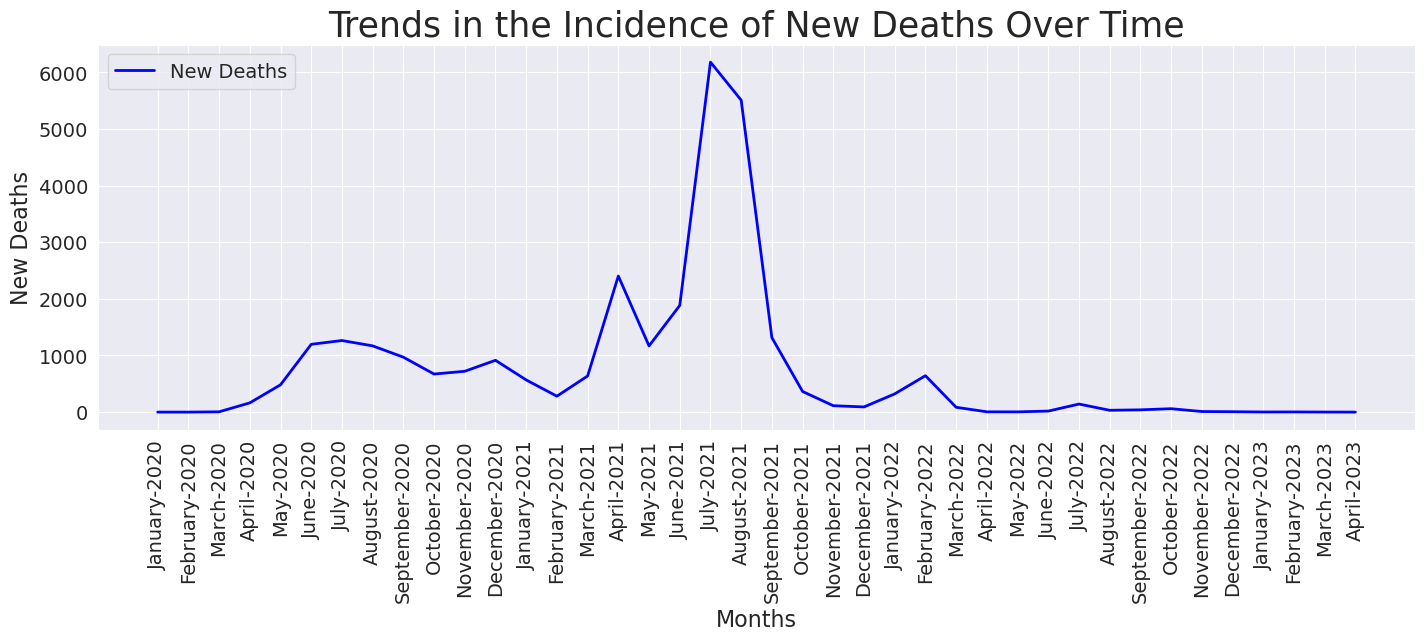

In [6]:
plt.plot(df['months'], df['new_deaths'], '-b', lw=2, ms=8)

plt.xlabel('Months', fontsize=16)
plt.ylabel('New Deaths', fontsize=16)
plt.title('Trends in the Incidence of New Deaths Over Time', fontsize=25)
plt.xticks(rotation = 'vertical')
plt.legend(['New Deaths'], loc='upper left')

plt.show();

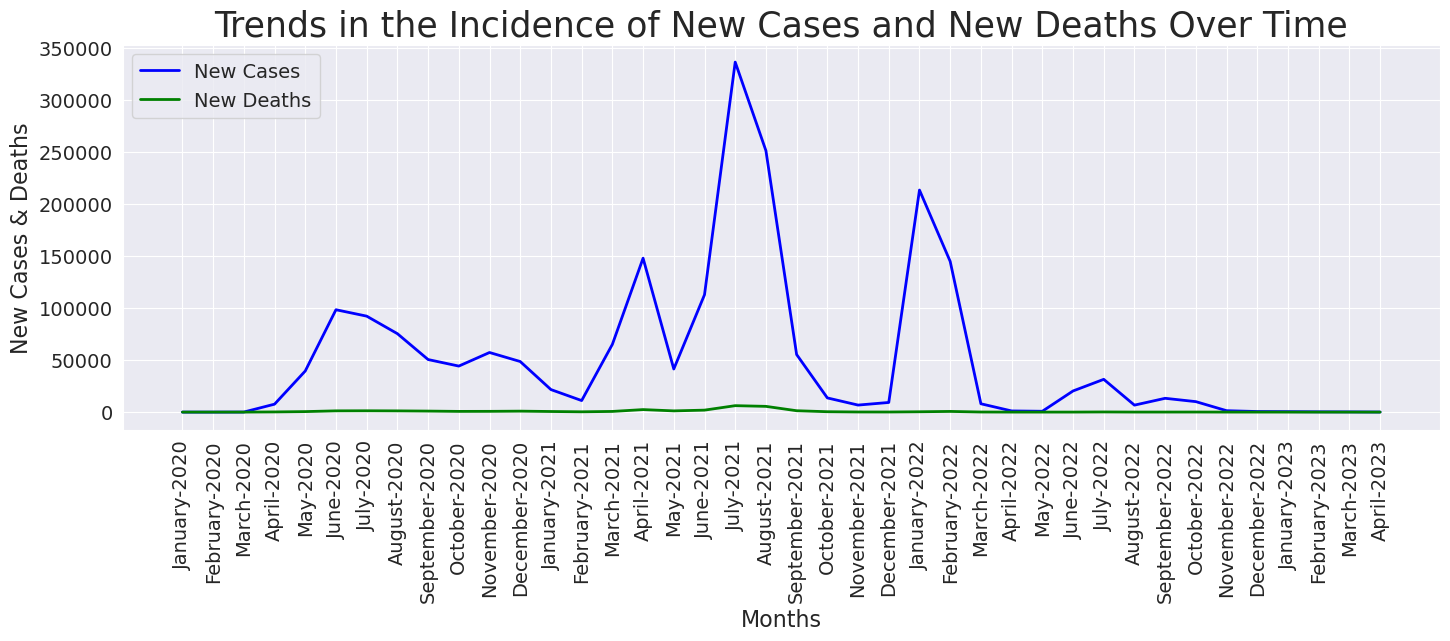

In [7]:
plt.plot(df['months'], df['new_cases'], '-b', lw=2, ms=8)
plt.plot(df['months'], df['new_deaths'], '-g', lw=2, ms=8)

plt.xlabel('Months', fontsize=16)
plt.ylabel('New Cases & Deaths', fontsize=16)
plt.title('Trends in the Incidence of New Cases and New Deaths Over Time', fontsize=25)
plt.xticks(rotation = 'vertical')
plt.legend(['New Cases', 'New Deaths'], loc='upper left')

plt.show();

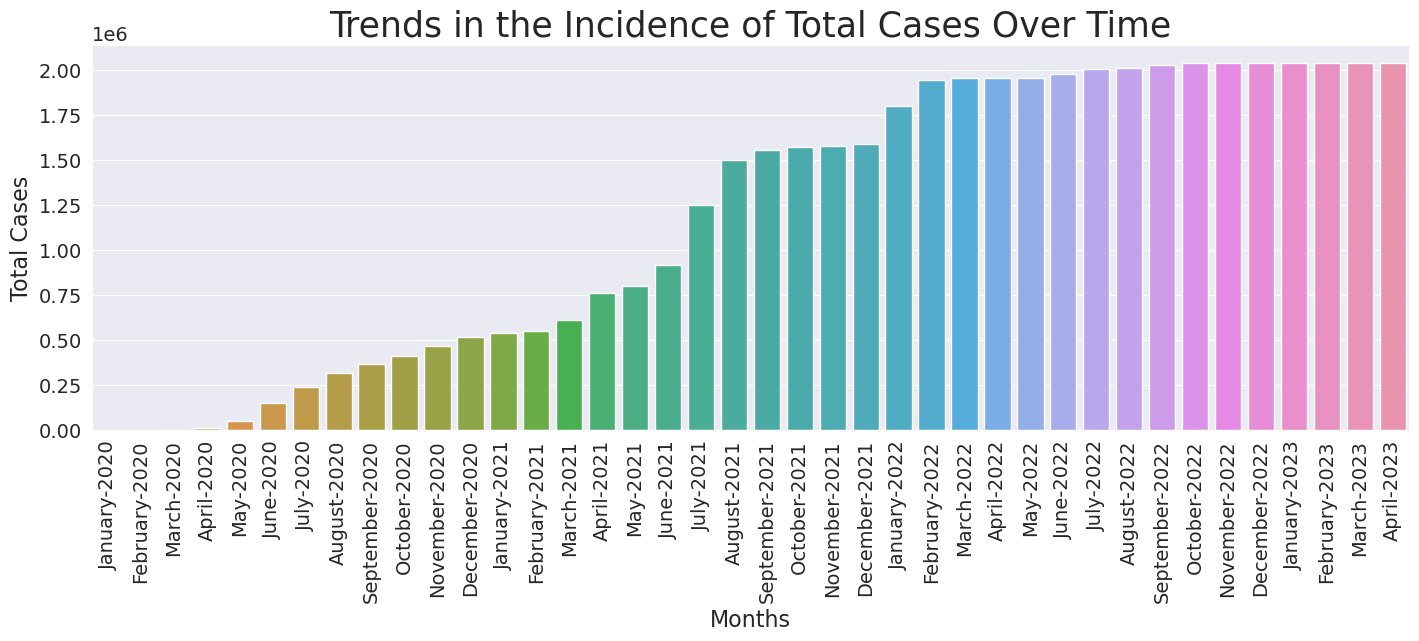

In [8]:
sns.barplot(x = "months", y = "total_cases", data=df)
plt.xlabel('Months', fontsize=16)
plt.ylabel('Total Cases', fontsize=16)
plt.title('Trends in the Incidence of Total Cases Over Time', fontsize=25)
plt.xticks(rotation = 'vertical')
plt.show();

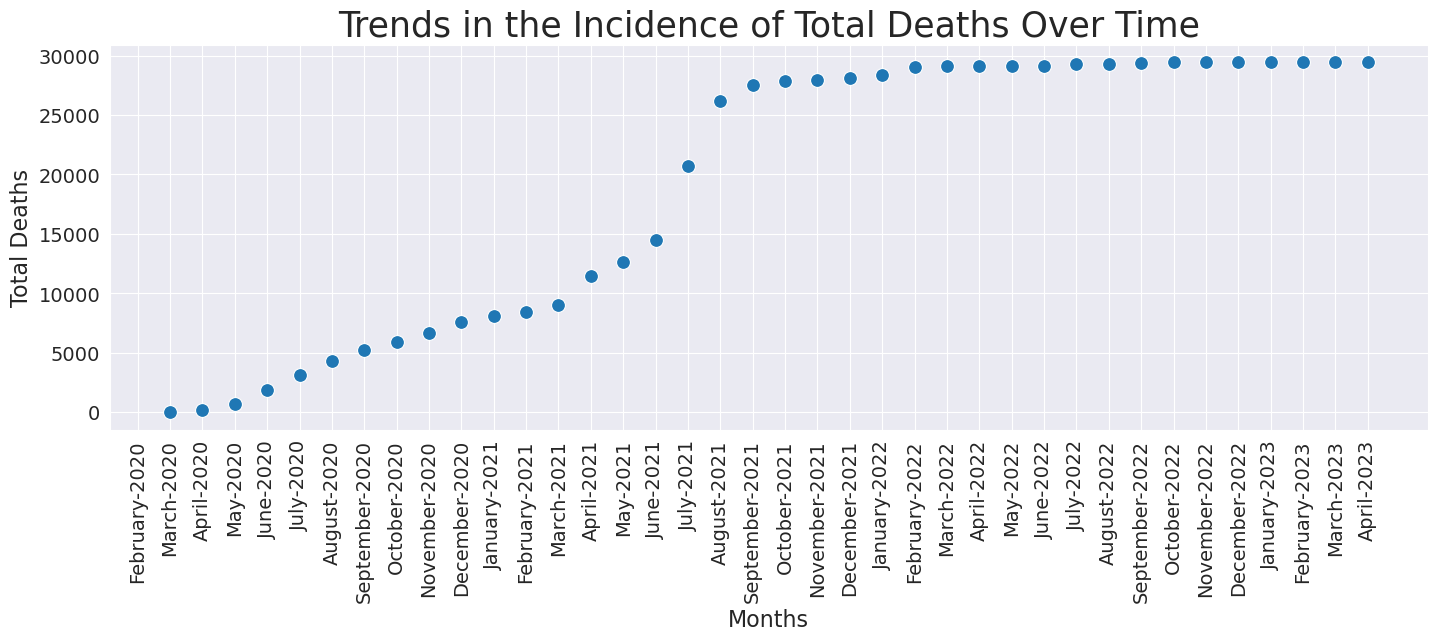

In [9]:
sns.scatterplot(x = "months", y = "total_deaths", s=100, data=df)
plt.xlabel('Months', fontsize=16)
plt.ylabel('Total Deaths', fontsize=16)
plt.title('Trends in the Incidence of Total Deaths Over Time', fontsize=25)
plt.xticks(rotation = 'vertical')
plt.show();

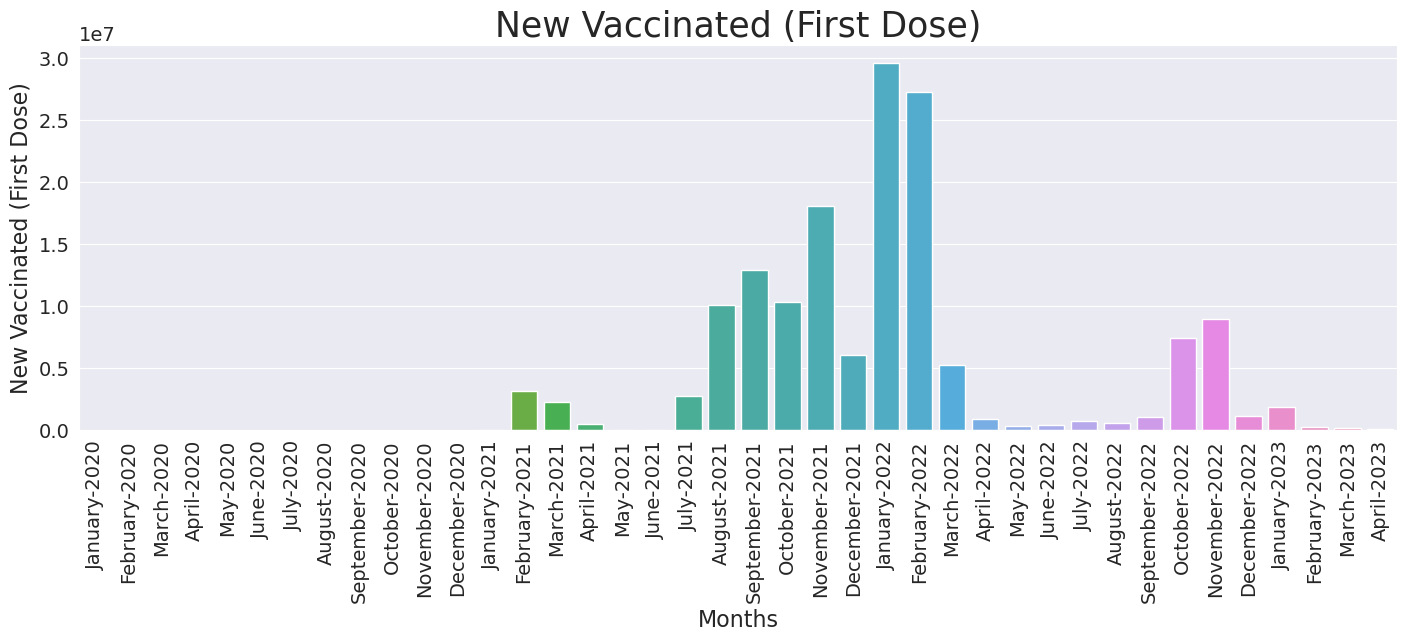

In [10]:
sns.barplot(x = "months", y = "new_vaccinated_(first-dose)", data=df)
plt.xlabel('Months', fontsize=16)
plt.ylabel('New Vaccinated (First Dose)', fontsize=16)
plt.title('New Vaccinated (First Dose)', fontsize=25)
plt.xticks(rotation = 'vertical')
plt.show();

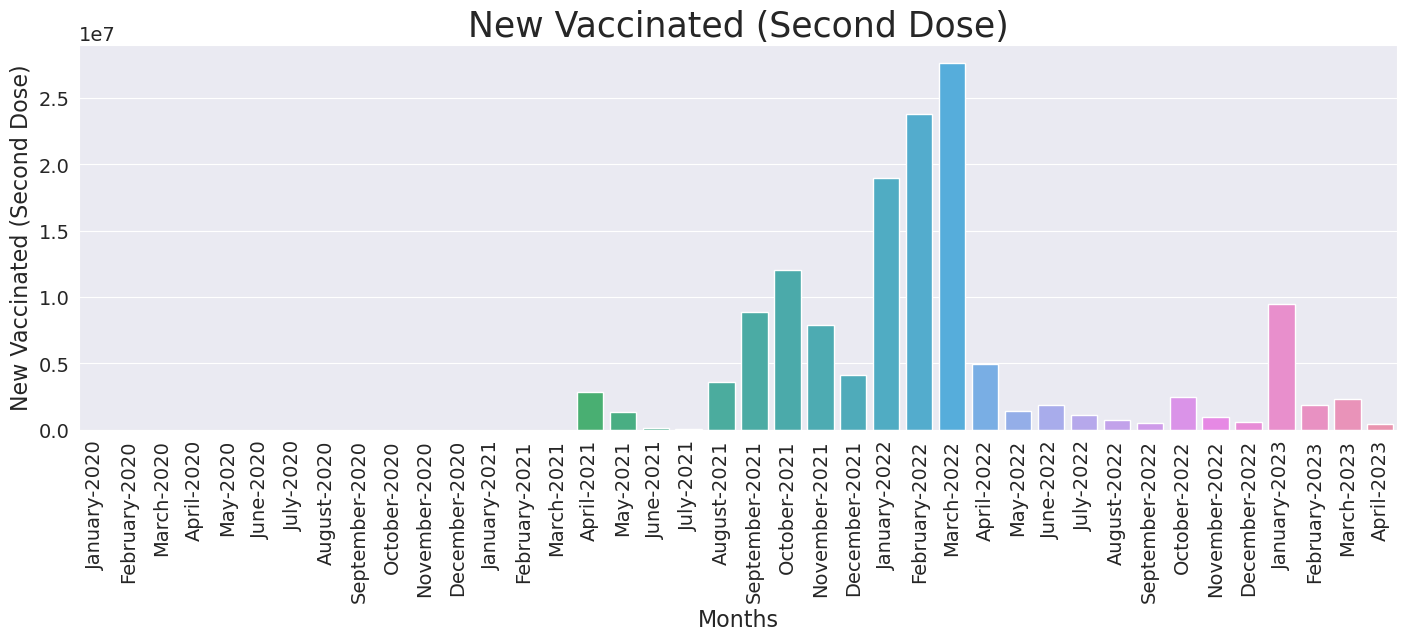

In [11]:
sns.barplot(x = "months", y = "new_vaccinated_(second-dose)", data=df)
plt.xlabel('Months', fontsize=16)
plt.ylabel('New Vaccinated (Second Dose)', fontsize=16)
plt.title('New Vaccinated (Second Dose)', fontsize=25)
plt.xticks(rotation = 'vertical')
plt.show();

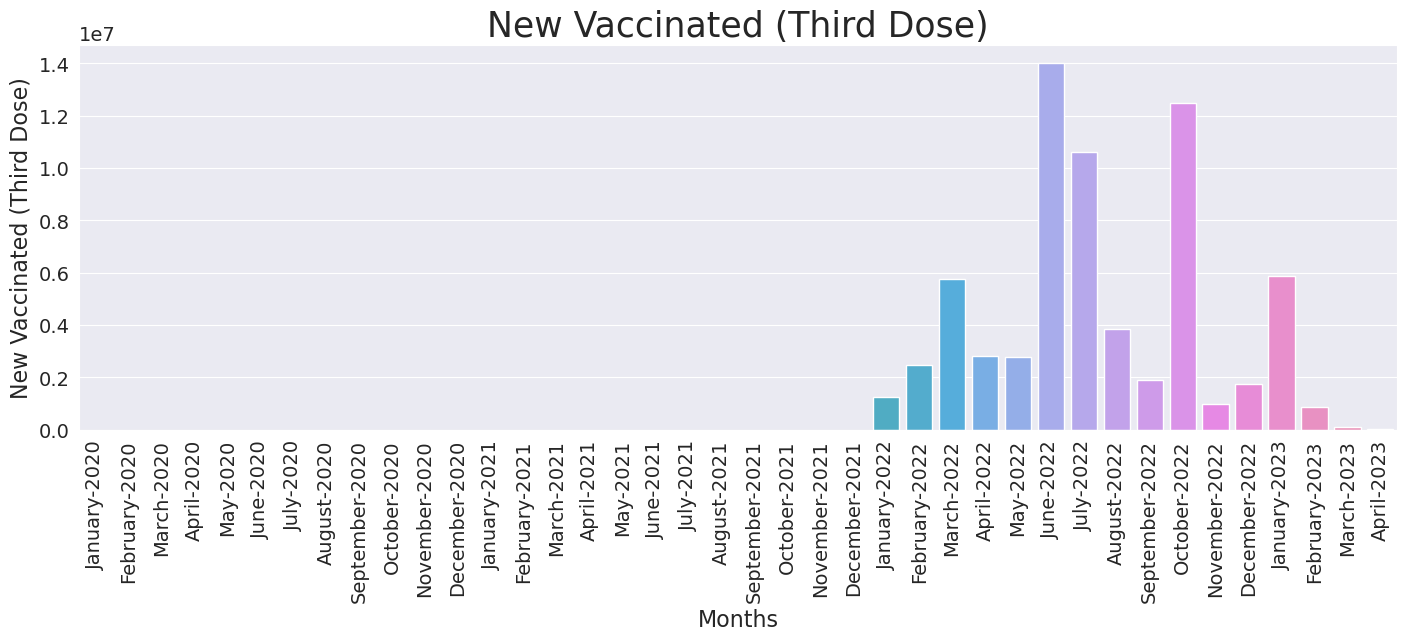

In [12]:
sns.barplot(x = "months", y = "new_vaccinated_(third-dose)", data=df)
plt.xlabel('Months', fontsize=16)
plt.ylabel('New Vaccinated (Third Dose)', fontsize=16)
plt.title('New Vaccinated (Third Dose)', fontsize=25)
plt.xticks(rotation = 'vertical')
plt.show();

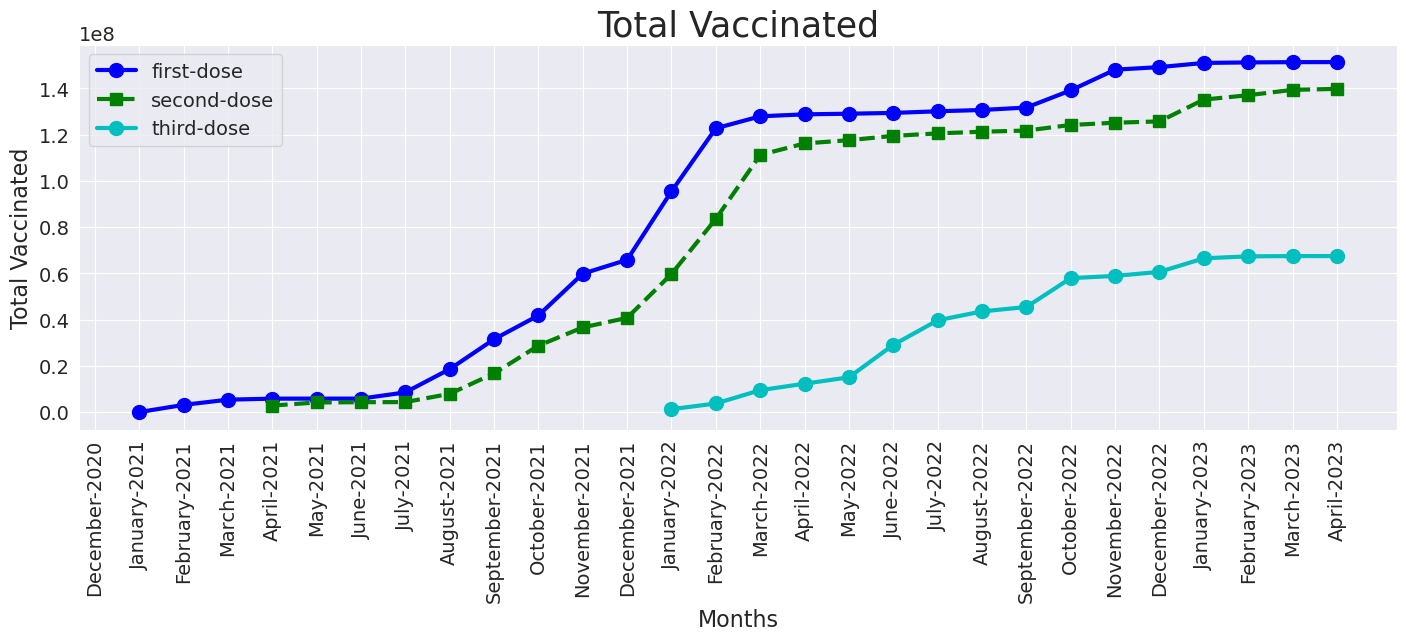

In [13]:
plt.plot(df["months"], df["total_vaccinated_(first-dose)"], 'o-b', lw=3, ms=10)
plt.plot(df["months"], df["total_vaccinated_(second-dose)"], 's--g', lw=3, ms=9)
plt.plot(df["months"], df["total_vaccinated_(third-dose)"], 'o-c', lw=3, ms=10)

plt.xlabel('Months', fontsize=16)
plt.ylabel('Total Vaccinated', fontsize=16)
plt.title('Total Vaccinated', fontsize=25)
plt.xticks(rotation = 'vertical')
plt.legend(['first-dose', 'second-dose', 'third-dose'], loc='upper left')

plt.show();

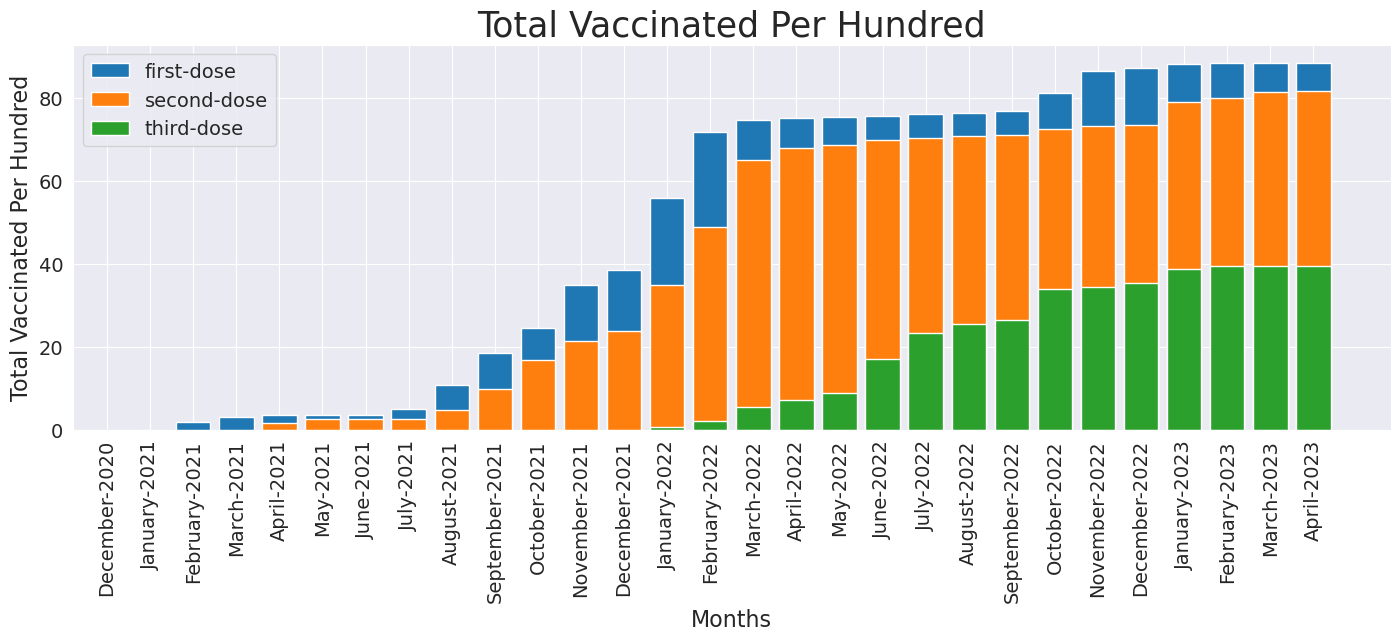

In [14]:
plt.bar(df["months"], df["total_vaccinated_per_hundred(first-dose)"])
plt.bar(df["months"], df["total_vaccinated_per_hundred(second-dose)"])
plt.bar(df["months"], df["total_vaccinated_per_hundred(third-dose)"])

plt.xlabel('Months', fontsize=16)
plt.ylabel('Total Vaccinated Per Hundred', fontsize=16)

plt.title('Total Vaccinated Per Hundred', fontsize=25)
plt.xticks(rotation = 'vertical')
plt.legend(['first-dose', 'second-dose', 'third-dose'], loc='upper left')

plt.show();

# Concluding Remarks

In conclusion, this study shows that the number of new cases is fluctuating over time, but generally increasing. The number of new deaths is also fluctuating, but generally lower than the number of new cases. The vaccination campaign seems to be progressing well, with an increasing number of people getting vaccinated and so on.